# Combining Under & Over Sampling

Oversampling gives the model more signals to learn from the minority class

Undersampling removes noisy/confusing majority class points (especially borderline ones)

Together, they improve class balance, boundary clarity, and model performance

*Article: https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc/*

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\\Users\\sunta\\OneDrive\\Desktop\\data\\sampling\\hear_data\\heart_2020_cleaned.csv")

In [4]:
from sklearn.model_selection import  cross_val_score
# now you can import normally from model_selection
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df1 = df.copy(deep = True)


col = list(df.columns)
categorical_features = []
numerical_features = []
for i in df1.columns:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        df1[i]=le.fit_transform(df1[i])
        categorical_features.append(i)

In [5]:
X=df1.drop(['HeartDisease',"Race"], axis=1)
y=df1['HeartDisease']
X = X.drop(columns=['AgeCategory'])

# SMOTETomek Links

*To genralize data & not overfit.*

1. (Start of SMOTE) Choose random data from the minority class.
2. Calculate the distance between the random data and its k nearest neighbors.
3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
4. Repeat step number 2–3 until the desired proportion of minority class is met. (End of SMOTE)
5. (Start of Tomek Links) Choose random data from the majority class.
6. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.

| 🔍 **Strategy**                        | ✅ **What It Helps With**                                            | ⚠️ **What It Risks**                                             |
| -------------------------------------- | ------------------------------------------------------------------- | ---------------------------------------------------------------- |
| **Only Oversampling (SMOTE)**          | Balances classes by **adding synthetic samples**                    | May lead to **overfitting** on noisy/duplicated minority samples |
| **Only Undersampling (Tomek, Random)** | Reduces class imbalance by **removing majority points**             | Can **lose important information** from majority class           |
| ✅ **SMOTE + Tomek**                    | SMOTE makes more minority examples; Tomek **cleans boundary noise** | Gives both **class balance** and **cleaner decision boundary**   |


In [6]:
from imblearn.combine import SMOTETomek

In [7]:
X_smotetl,y_smotetl = SMOTETomek().fit_resample(X,y)

c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='HeartDisease', ylabel='count'>

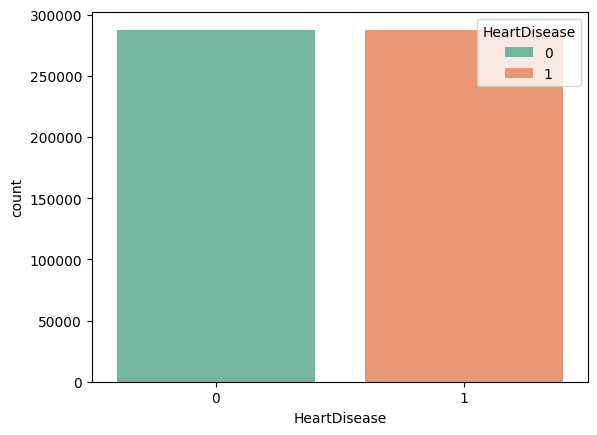

In [8]:
sns.countplot(x=y_smotetl,hue=y_smotetl,palette='Set2')

*Can learn more from -https://www.kaggle.com/code/ahmadrafiee/handling-imbalanced-2-resampling-techniques/notebook#--Tackling-with-Imbalanced-Datasets:-Part-Two(Resampling-Technique-beginner-to-advance)--*